In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

import tensorflow.compat.v2.feature_column as fc

In [2]:
string = tf.Variable("this is a string", tf.string)
number= tf.Variable(324, tf.int16)
floating = tf.Variable(3.567, tf.float64)

In [3]:
rank1_tensor = tf.Variable(["test", "ok", "vipul"], tf.string)
rank2_tensor= tf.Variable([['test', 'ok'], ["test1", "yes"]], tf.string)

In [4]:
tf.rank(rank1_tensor), tf.rank(rank2_tensor), tf.rank(number)

(<tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>)

In [5]:
rank1_tensor.shape, rank2_tensor.shape, number.shape

(TensorShape([3]), TensorShape([2, 2]), TensorShape([]))

In [6]:
tensor1 = tf.ones([1,2,3])
tensor2 = tf.reshape(tensor1, shape=[2,3,1])
tensor3 = tf.reshape(tensor2, shape= [3, -1])
print(tensor1)
print("--------------------")
print(tensor2)
print("--------------------")
print(tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
--------------------
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
--------------------
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


In [7]:
# t = tf.zeros([5,5,5,5])
# t

In [8]:
# t= tf.reshape(t, shape= [625])
# t

In [9]:
# t= tf.reshape(t, shape= [125, -1])
# t

####
Tensorflow core learning algorithms

In [10]:
## Linear Regression
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

<Axes: >

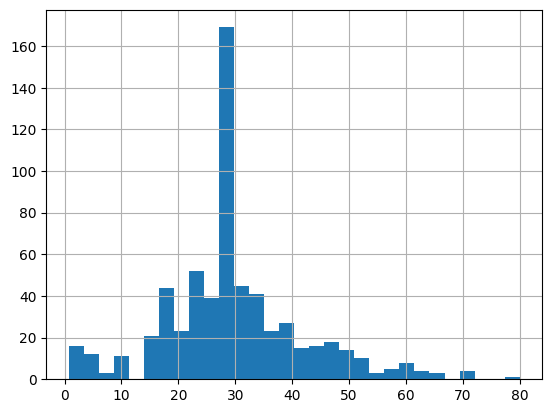

In [11]:
dftrain['age'].hist(bins= 30)

<Axes: ylabel='sex'>

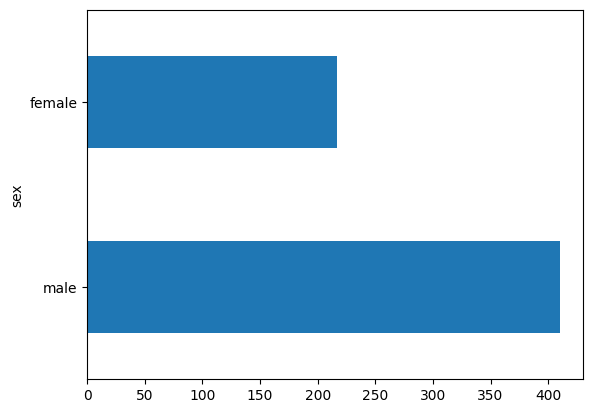

In [12]:
dftrain['sex'].value_counts().plot(kind= 'barh')

<Axes: ylabel='class'>

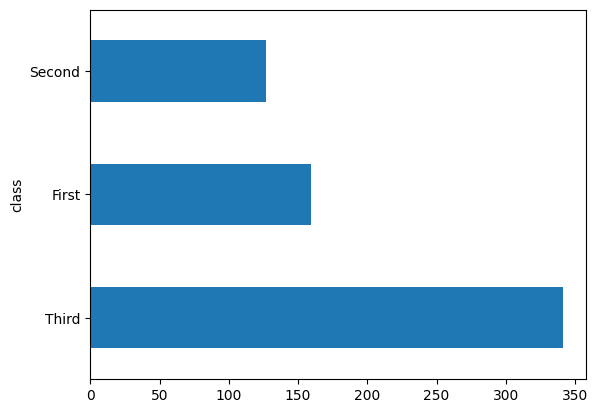

In [13]:
dftrain['class'].value_counts().plot(kind= 'barh')

Text(0.5, 0, '% survive')

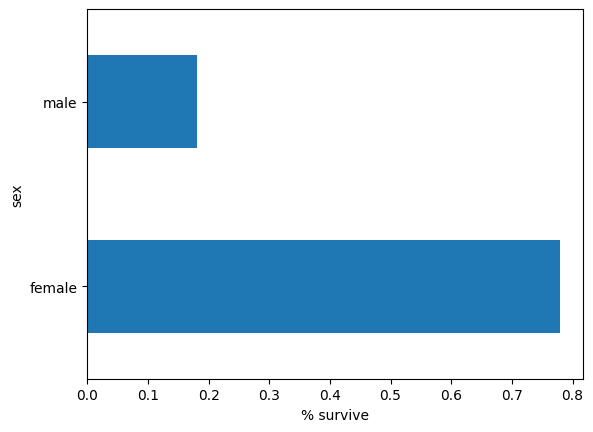

In [14]:
pd.concat([dftrain, y_train], axis= 1).groupby('sex')['survived'].mean().plot(kind= 'barh').set_xlabel('% survive')

In [20]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns= []

for feature_name in CATEGORICAL_COLUMNS:
    vocabulary= dftrain[feature_name].unique() # unique values in a feature column
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype= tf.float32))
    

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [21]:
feature_columns

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(np.int64(1), np.int64(0), np.int64(3), np.int64(4), np.int64(2), np.int64(5), np.int64(8)), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(np.int64(0), np.int64(1), np.int64(2), np.int64(5), np.int64(3), np.int64(4)), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.stri

In [ ]:
def make_input_fn(data_df, label_df, num_epochs= 10, shuffle= True, batch_size= 32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds= ds.shuffle(1000) # randomize order of data
        ds= ds.batch(batch_size).repeat(num_epochs) # split dataset into batches of 32 and repeat process for number of epochs
        return ds
    return input_function

In [28]:
train_input_fn= make_input_fn(dftrain, y_train)
eval_input_fn= make_input_fn(dfeval, y_eval, num_epochs=1, shuffle= False)